# Samuels Viewer

Interface to functionality for viewing and comparing corpora processed with the Samuels Processor

In [1]:
import SamuelsCorpus as Sam
%matplotlib inline

Set up some filenames - these should be the base names (Samuels Viewer will add the _combined.csv and _cooccurrence.json endings for the individual files.  Only set the parentdir if these files are not stored in the current directory.)

In [2]:
#parentdir="/Users/juliewe/Dropbox/oldbailey/speech_corpora/theft/all/samuels_tagged"
filenames={'fnonl':'f_nonl','mnonl':'m_nonl'}
           

Load up files into a Samuels Viewer

In [3]:
mnonl=Sam.Viewer(filenames['mnonl'],colors=['b'])

Now we can play with the bag-of-words functionality in the SamuelsViewer

Size of corpus is 1083003
(ZC [Grammatical Item],269044) : [('the', 69961), ('and', 29520), ('of', 21756), ('a', 20912), ('to', 20137), ('in', 18059), ('on', 9119), ('at', 7162), ('had', 5852), ('with', 5749)]
(NULL,147919) : [(',', 68482), ('.', 44535), (';', 28994), ('-', 1731), (':', 1378), ('(', 660), (')', 652), ('"', 484), ('?', 390), ('!', 117)]
(ZF [Pronoun],140523) : [('i', 55190), ('he', 21232), ('it', 13796), ('him', 13530), ('me', 8557), ('them', 5031), ('she', 4690), ('they', 3497), ('her', 3012), ('we', 2619)]
(AK.01.g [State/condition],40193) : [('was', 18505), ('am', 6957), ('is', 4689), ('were', 3624), ('been', 1955), ('be', 1669), ('are', 1448), ('way', 434), ('being', 430), ("'s", 377)]
(AP.04 [Number],25141) : [('two', 3211), ('one', 2279), ('three', 1709), ('five', 1171), ('four', 1111), ('six', 921), ('ten', 843), ('last', 813), ('seven', 802), ('eight', 747)]
(AW.01 [Owning],19641) : [('my', 9800), ('his', 6139), ('her', 1525), ('our', 590), ('own', 508), ('their

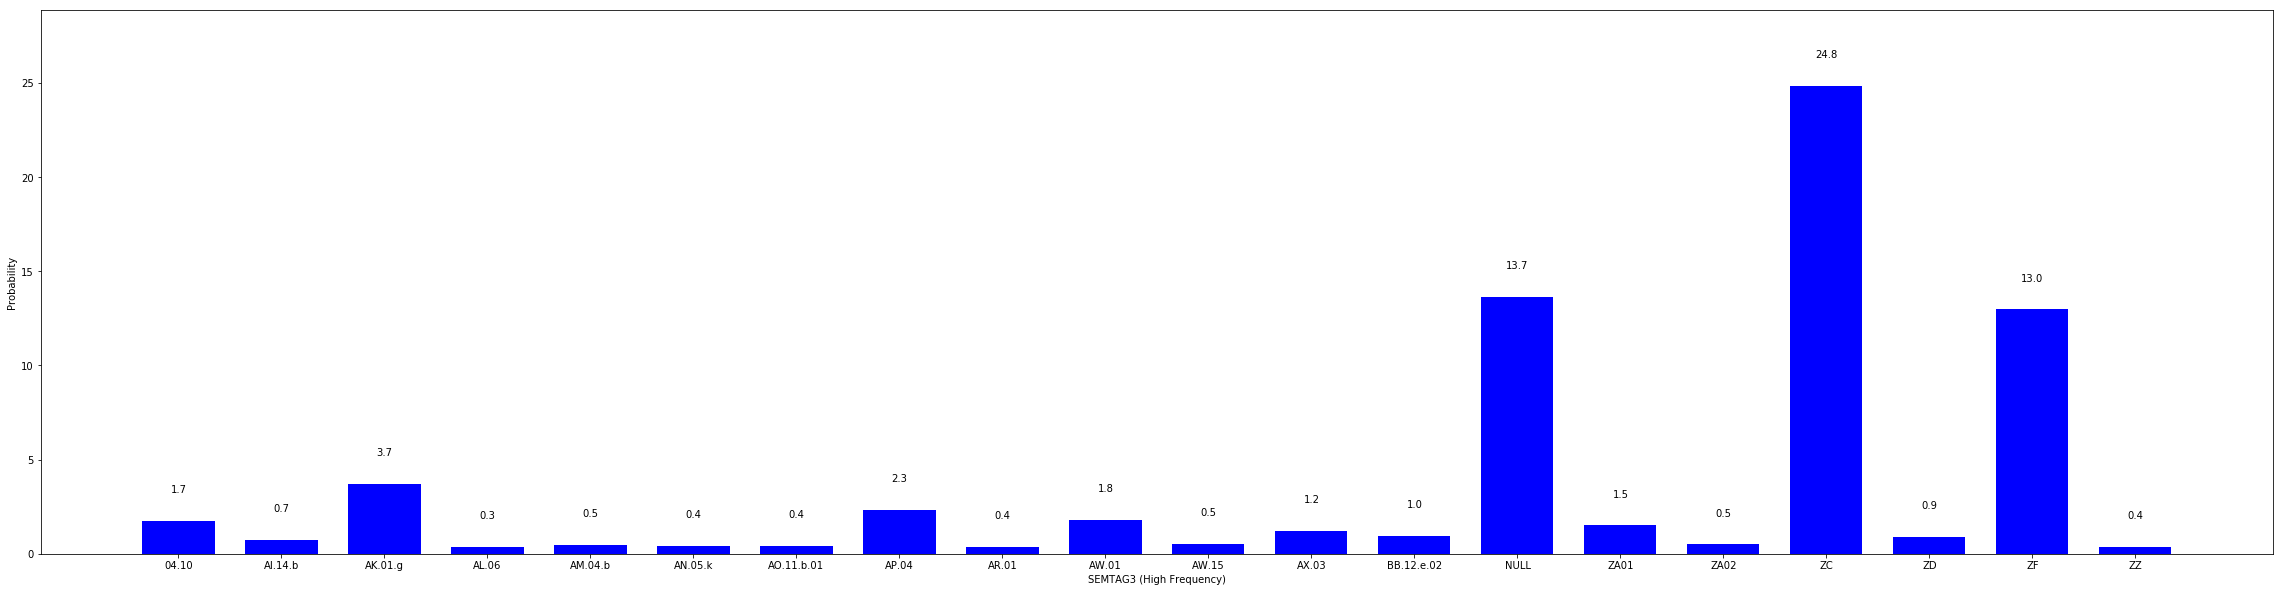

In [4]:
mnonl_tagbag=mnonl.make_bow(field='SEMTAG3',cutoff=20,displaygraph=True)

There are functions to find tags for words and words for tags e.g.,

In [28]:
print(mnonl.find_tags('woman',field='SEMTAG3'))
print(mnonl.find_tags('women'))

[('AD.03.b [Woman]', 673), ('AY.06.b [The common people]', 12), ('AY.01.g.01 [Married woman]', 4), ('BB.09.b.01 [Servant]', 3)]
[('AD.03.b [Woman]', 77), ('AY.06.b [The common people]', 3), ('BB.09.b.01 [Servant]', 1), ('AY.01.g.01 [Married woman]', 1)]


In [29]:
print(mnonl.find_tags('man'))
print(mnonl.find_tags('men'))

[('AD.03.a [Man]', 2884), ('AD.03.h.01 [Old man]', 9), ('ZA01 [Personal Name]', 2), ('AB.17.e.04.e [Digit - finger, toe]', 2)]
[('AD.03.a [Man]', 521)]


In [30]:
print(mnonl.find_tags('child'))
print(mnonl.find_tags('children'))

[('AD.03.d [Child]', 160), ('AY.01.e.02 [Child]', 9), ('AR.46.c [Suggestion, proposal]', 2), ('ZA01 [Personal Name]', 1), ('AK.03.b [Source/origin]', 1)]
[('AD.03.d [Child]', 89), ('AY.01.e.02 [Child]', 5)]


In [34]:
print(mnonl.find_text('AD.03.b'))

[('woman', 673), ('women', 77), ('wife', 11), ('sister', 4), ('piece', 3), ('petticoat', 2), ('pieces', 1), ('petticoats', 1), ('mare', 1), ('ladies', 1)]


In [35]:
print(mnonl.find_text('AD.03.a'))

[('man', 2884), ('men', 521), ('gentleman', 23), ('piece', 17), ('horse', 16), ('boy', 10), ('pieces', 8), ('horses', 7), ('a', 3), ('mans', 2)]


In [36]:
print(mnonl.find_text('AD.03.d'))

[('child', 160), ('children', 89), ('small', 9), ('smaller', 1)]


We can also view the co-occurrence distributions for tags.  

* Note that the number associated with the tag is a weight.  Currently it is set to be normalised localised PPMI.  Localised PPMI multiplies PPMI by probability.  Normalisation means that the vector is a unit vector (this won't change the order of saliency but typically makes all of the numbers smaller since the unit vector has length 1 ... the reason for doing this is that it is then more efficient to compute similarities between vectors).

* The list of words (and associated words) for the conceptual features ARE NOW context-specific i.e., words used to express this conceptual feature in the specific context of the given tag.

(_det:ZC [Grammatical Item],0.9281662504790895) : [('the', 340), ('a', 229), ('this', 51), ('an', 6), ('these', 5)]
(_amod:AF.05 [Plants defined by age/cycles],0.2309745799292507) : [('young', 58)]
(_amod:AP.01.f [Difference],0.17140603808980628) : [('other', 57)]
(_det:ZZ [Unrecognised],0.12874563480815127) : [('another', 41)]
(attr:AK.01.g [State/condition],0.10680230215189915) : [('is', 37), ('was', 33), ('were', 3), ('be', 3), ('being', 2), ('am', 1), ("'s", 1)]
(pobj:ZC [Grammatical Item],0.0867194410138719) : [('with', 42), ('by', 36), ('to', 34), ('of', 29), ('from', 13), ('for', 7), ('after', 3), ('about', 3), ('under', 2), ('on', 2)]
(_nummod:AP.04 [Number],0.041774722379964366) : [('two', 34), ('three', 4), ('four', 2), ('ten', 1), ('one', 1), ('five', 1)]
(dobj:AN.05.l.01 [Meeting/encounter],0.038002822212485535) : [('met', 13), ('meet', 1)]
(_relcl:AY.01.g.03 [Types of marriage custom/practice],0.037917081245631125) : [('lived', 8), ('lives', 1)]
(nsubj:AK.01 [Existence],0.

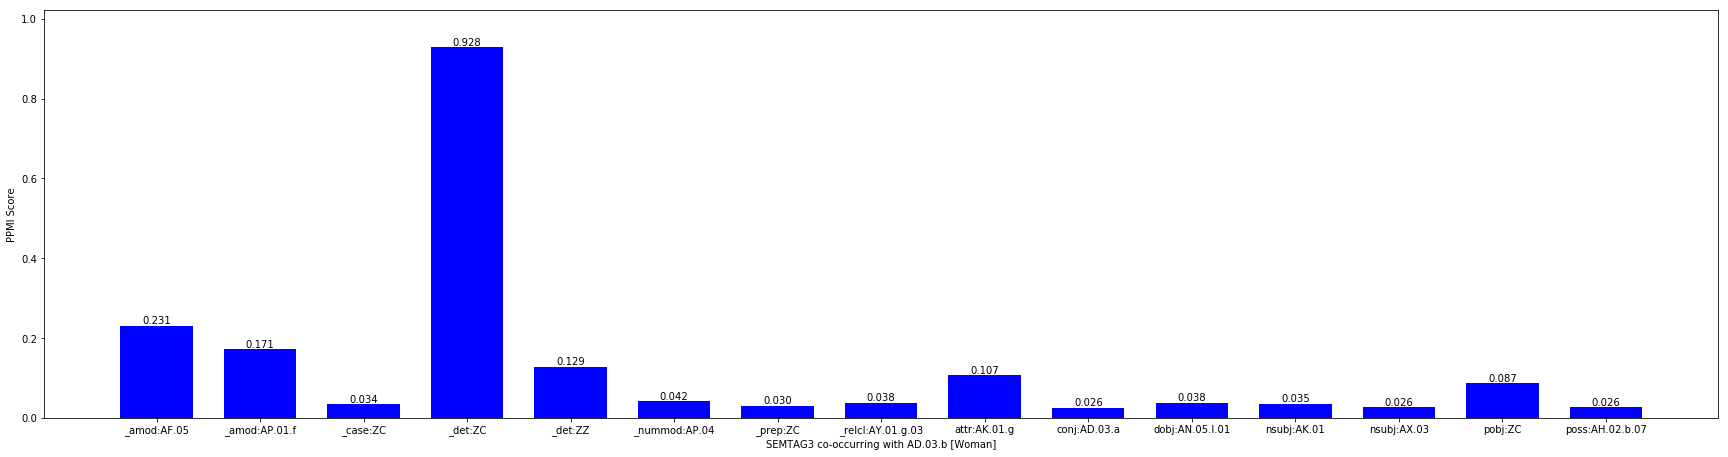

In [8]:
woman=mnonl.get_top_features('AD.03.b',displaygraph=True,cutoff=15)

(_det, 0.9203651401451238)
(_amod, 0.2973927104807386)
(nsubj, 0.16203072207077043)
(_relcl, 0.11509167441101174)
(attr, 0.09795235879648512)
(pobj, 0.08673589795168965)
(dobj, 0.05799222379574188)
(_acl, 0.04354990892729252)
(_nummod, 0.036396711686242214)
(_case, 0.030951843006760276)
(_prep, 0.016022768325470685)
(nsubjpass, 0.005336524792725848)
(_appos, 0.003662791249259902)
(appos, 0.003662791249259902)
(poss, 0.0036357214030100222)


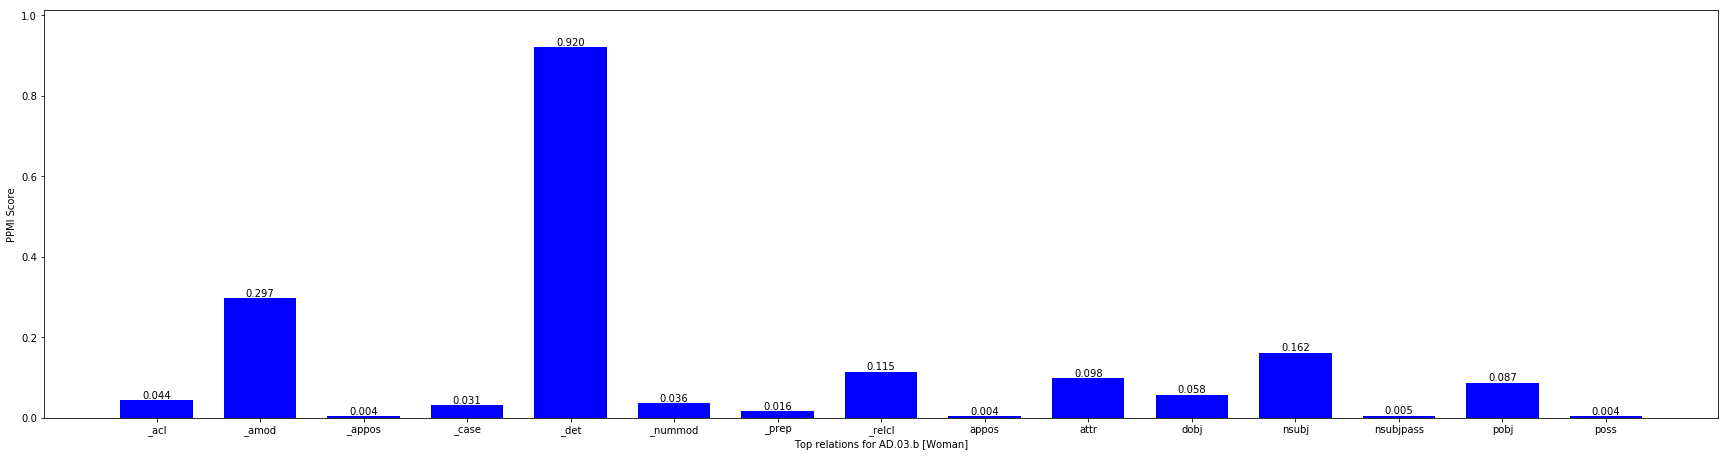

In [37]:
r=mnonl.get_top_relations('AD.03.b',displaygraph=True,cutoff=15)

(_det, 0.8818533822427765)
(_amod, 0.30532335425871787)
(attr, 0.2431648078630329)
(_relcl, 0.18396669039938038)
(nsubj, 0.14176854216186763)
(dobj, 0.07403056330863408)
(_nummod, 0.07332339985939462)
(_acl, 0.06442636740579129)
(pobj, 0.026779218706026807)
(_case, 0.01720247642340742)
(appos, 0.0025778380389628124)
(_predet, 0.0021210758160622304)
(nsubjpass, 0.0018033214501509249)
(_appos, 0.0017629968649309183)
(_poss, 0.0017078904232501674)


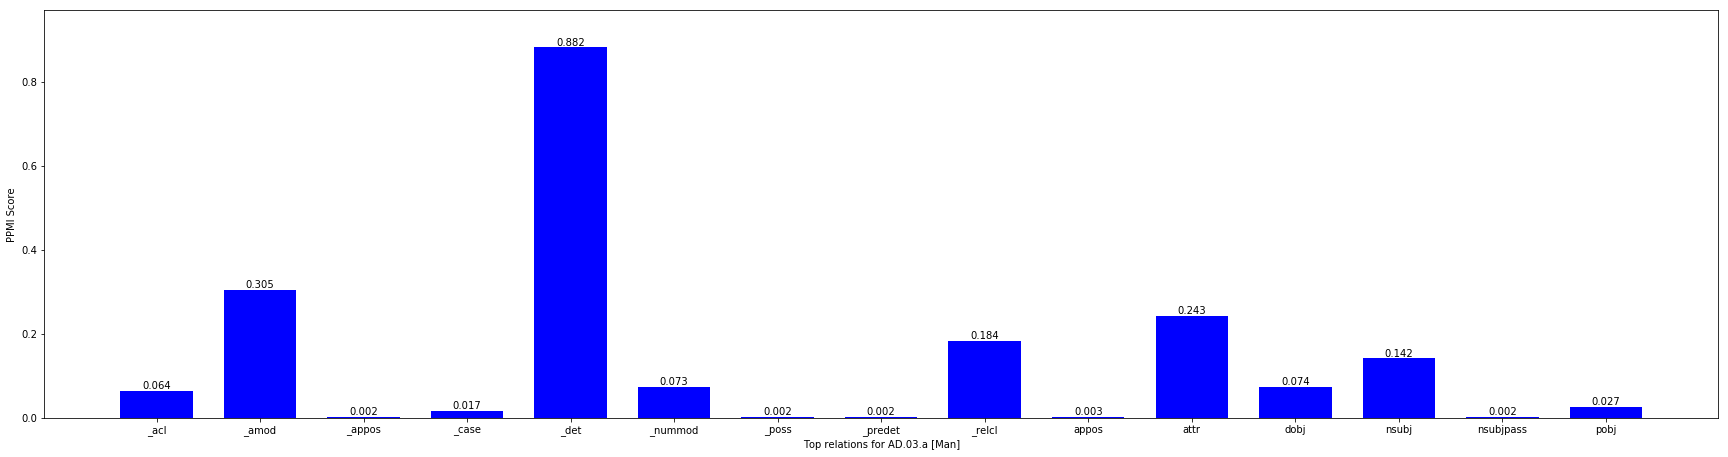

In [38]:
mr=mnonl.get_top_relations('AD.03.a',displaygraph=True,cutoff=15)

(_det, 0.7067210351876916)
(_nummod, 0.42740740409175293)
(_case, 0.3274028447692652)
(conj, 0.2495486191458458)
(_poss, 0.2452309605613258)
(poss, 0.1497389645090203)
(pobj, 0.14243112706534838)
(dobj, 0.138021427898484)
(_amod, 0.12056072508087409)
(_relcl, 0.0730902772281184)
(nsubj, 0.0678074348818081)
(attr, 0.031671446725905036)
(amod, 0.028233542704519974)
(_acl, 0.012556244589903504)
(_predet, 0.005874857457367353)


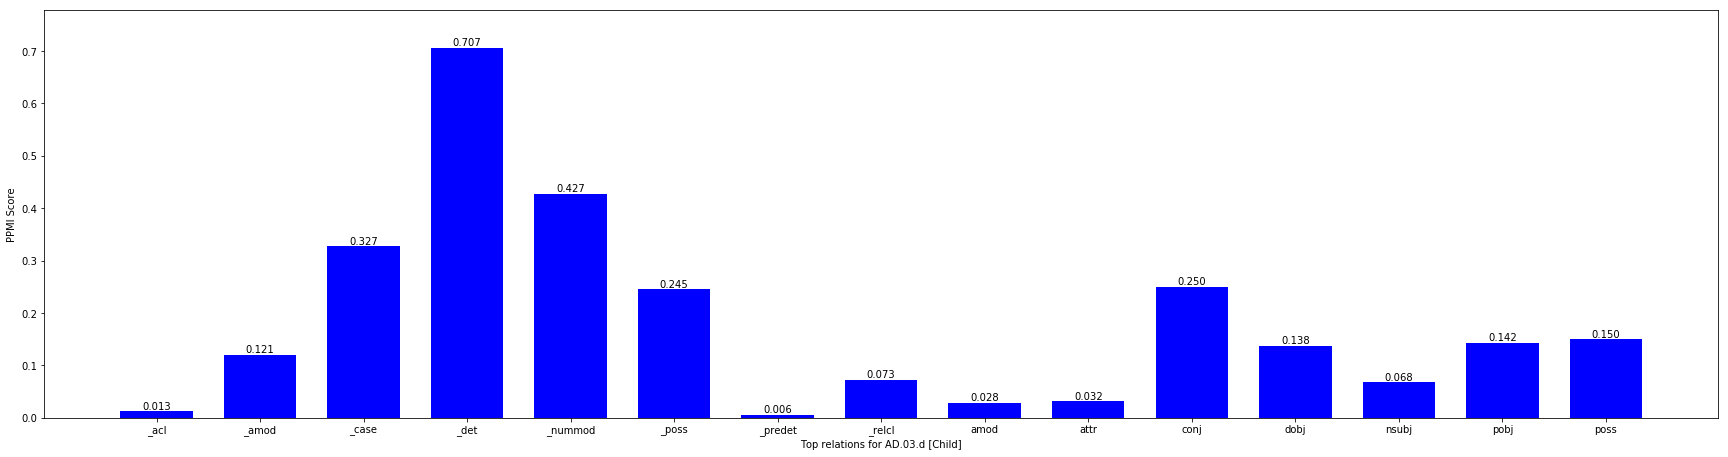

In [39]:
cr=mnonl.get_top_relations('AD.03.d',displaygraph=True,cutoff=15)

(AF.05 [Plants defined by age/cycles],0.8819557730260679) : [('young', 58)]
(AP.01.f [Difference],0.44416468549368315) : [('other', 57)]
(AB.03 [Age],0.10548948308775473) : [('elderly', 5), ('young', 1)]
(AP.07.e.05 [Fact/action of being joined/joining],0.07916976051279104) : [('married', 4)]
(AW.04 [Poverty],0.037125264302986356) : [('poor', 3)]
(AT.06 [Badness/evil],0.02974568233563226) : [('bad', 3)]
(AI.16.a.02 [Scouring/scrubbing/rubbing],0.025761339782079357) : [('scouring', 1)]
(AM.08.c.03 [Oldness/ancientness],0.025324900644629632) : [('old', 6)]
(AS.20 [Beauty, pleasing appearance],0.023774339687039948) : [('handsome', 1), ('good-looking', 1)]
(AP.06.c.01 [Addition/supplementation],0.02178154759830146) : [('other', 3)]


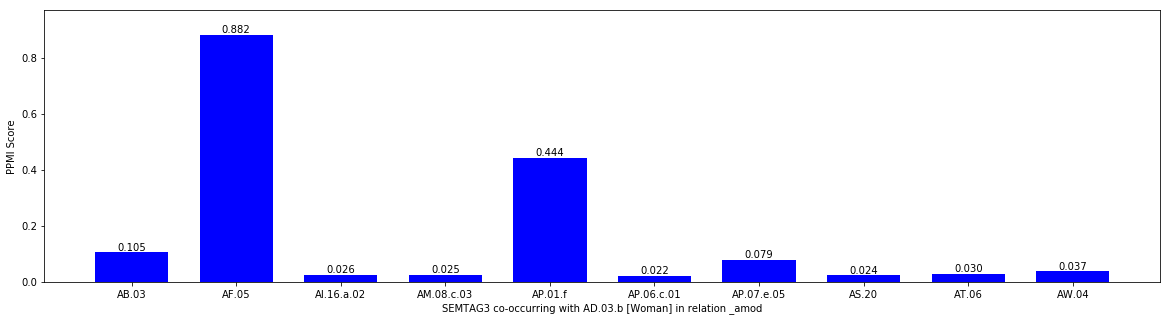

In [11]:
w=mnonl.get_top_features('AD.03.b',rel='_amod',displaygraph=True)

(AF.05 [Plants defined by age/cycles],0.9595112729210316) : [('young', 243)]
(AP.01.f [Difference],0.23392524841151652) : [('other', 167), ('different', 1)]
(AB.17.c [Bodily height],0.08001286176174242) : [('tall', 17), ('taller', 2)]
(AE.03 [Domestic animal],0.07825346004174877) : [('labouring', 18)]
(BD.04.d [Probity/honesty/uprightness],0.07535633227149376) : [('honest', 15), ('respectable', 5)]
(AP.01.d [Identity],0.033071669985961887) : [('same', 61), ('identical', 1)]
(AW.04 [Poverty],0.03271431325644311) : [('poor', 11)]
(BH.14.b [Seafaring life],0.027089305764833805) : [('seafaring', 6)]
(AB.03 [Age],0.026602763768443453) : [('elderly', 5), ('young', 4)]
(AG.01.ak.02.a [Excess in drinking],0.023222401013265535) : [('drunken', 5), ('jolly', 1)]


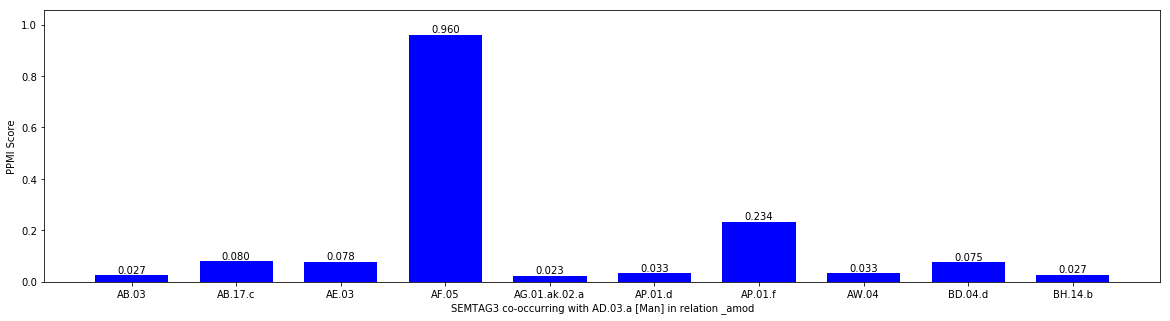

In [12]:
m=mnonl.get_top_features('AD.03.a',rel='_amod',displaygraph=True)

(AD.03.d [Child],0.8953349342521663) : [('small', 7)]
(AK.01 [Existence],0.36777950285447814) : [('unborn', 3)]
(AS.13.b [High reputation, honour],0.13304903749602) : [('grand', 1)]
(AS.11.a [Unimportance, triviality],0.11182734144414672) : [('little', 3)]
(AU.27.b [Loved one],0.1105620153066347) : [('dear', 1)]
(AY.01.e.02 [Child],0.1105620153066347) : [('orphan', 1)]
(AB.03 [Age],0.06799882120112041) : [('eldest', 1)]
(AF.05 [Plants defined by age/cycles],0.05501891397083546) : [('young', 2)]
(AL.02.d.01 [Largeness],0.028413959211939684) : [('big', 1)]


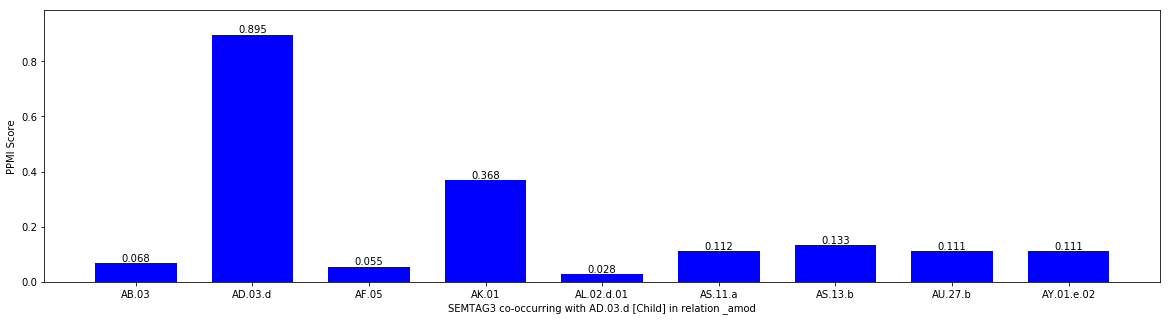

In [13]:
c=mnonl.get_top_features('AD.03.d',rel='_amod',cutoff=10,displaygraph=True)

(AN.05.l.01 [Meeting/encounter],0.8192414024662863) : [('met', 13), ('meet', 1)]
(AI.14.b [Seeing/looking],0.32736072224294593) : [('saw', 17), ('seen', 2), ('see', 1)]
(AG.01.v [Serving food],0.2630711508788512) : [('serving', 2), ('served', 2)]
(AW.15 [Taking],0.13245992067822063) : [('took', 9), ('take', 5), ('taken', 1)]
(AL.03.f.05 [Curved surface],0.12854545090374614) : [('vaults', 1)]
(AI [Physical sensation],0.12546868555163432) : [('apprehended', 3), ('apprehending', 1)]
(AN.06 [Transference],0.12486229206529767) : [('sent', 3), ('send', 2), ('fetched', 2), ('brought', 1)]
(AS.06 [Accusation, charge],0.10987645522677847) : [('accused', 1), ('accuse', 1)]
(AU.46 [Source of fear],0.1060659455998903) : [('frighten', 1)]
(AB.18.d.01 [Man-killing/homicide],0.08599648467843604) : [('murder', 1)]


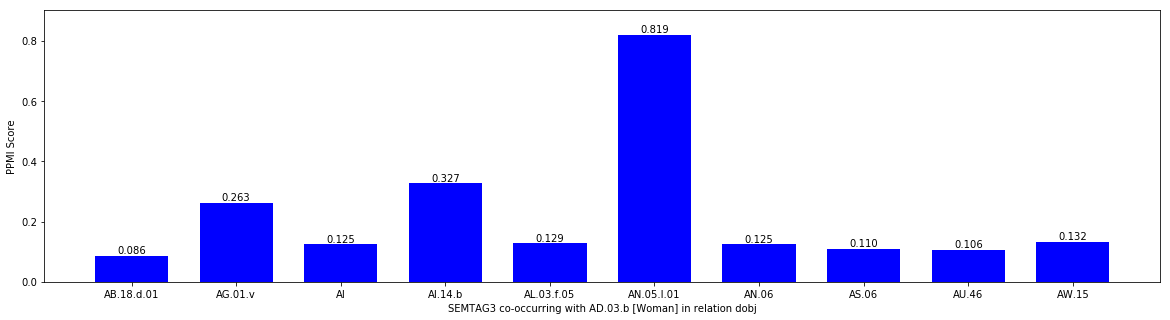

In [40]:
w=mnonl.get_top_features('AD.03.b',rel='dobj',displaygraph=True)

(AI.14.b [Seeing/looking],0.8443905455724461) : [('saw', 138), ('seen', 10), ('seeing', 4), ('see', 4), ('observed', 1)]
(AN.05.l.01 [Meeting/encounter],0.48281896423249193) : [('met', 45), ('meet', 1)]
(AR.36 [Knowledge],0.08458602582896964) : [('knew', 15), ('know', 13), ('had', 2), ('has', 1)]
(AN.03.d.02 [Following behind],0.08319885043519551) : [('pursued', 10), ('pursuing', 1), ('pursue', 1), ('following', 1)]
(AO.09 [Ceasing],0.07829809774573648) : [('stop', 10), ('stopped', 8)]
(AW.16.c [Robbery, piracy, raiding],0.07677152981154528) : [('robbed', 8), ('robbing', 2), ('rob', 2)]
(AY.04.c.01 [Meeting/assembling for common purpose],0.06151234777459601) : [('met', 4)]
(AW.15.a [Seizing, capture],0.06141364586830842) : [('seized', 6), ('seize', 2), ('caught', 1)]
(AN.06 [Transference],0.06115425112369993) : [('sent', 18), ('brought', 6), ('bring', 3), ('fetch', 2), ('send', 1)]
(AI.15.d.04 [Loud cry/shout],0.04939891026285218) : [('called', 9), ('call', 2)]


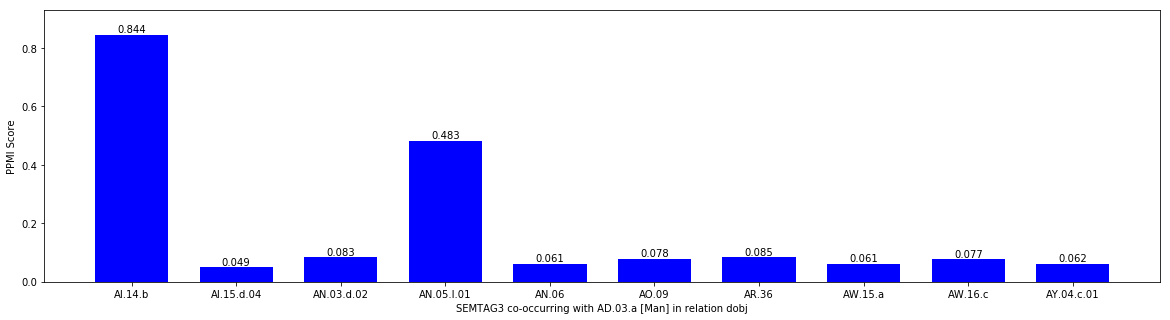

In [44]:
m=mnonl.get_top_features('AD.03.a',rel='dobj',displaygraph=True)

(AR.01 [Mental capacity],0.6778259690242985) : [('had', 7), ('have', 2), ('has', 1)]
(AJ.09.a [Quality of colour],0.3090183229700636) : [('warm', 1)]
(BK.01.d.04.c [Billiards/pool/snooker],0.3090183229700636) : [('nursed', 1)]
(BE.01 [Upbringing],0.3090183229700636) : [('nursed', 1)]
(BE.02 [Teaching],0.24122678002391187) : [('teached', 1)]
(AI.16.a.01 [Washing],0.21203055164137866) : [('washing', 1)]
(AN.06 [Transference],0.18934225691736906) : [('send', 2), ('sent', 1), ('brought', 1)]
(AJ.04.a.01 [State of being thick enough to retain form],0.15470451269461355) : [('set', 1)]
(AX.26 [Malediction],0.15059185792769056) : [('swear', 1)]
(AW.07 [Loss],0.12032492293670297) : [('lost', 2)]


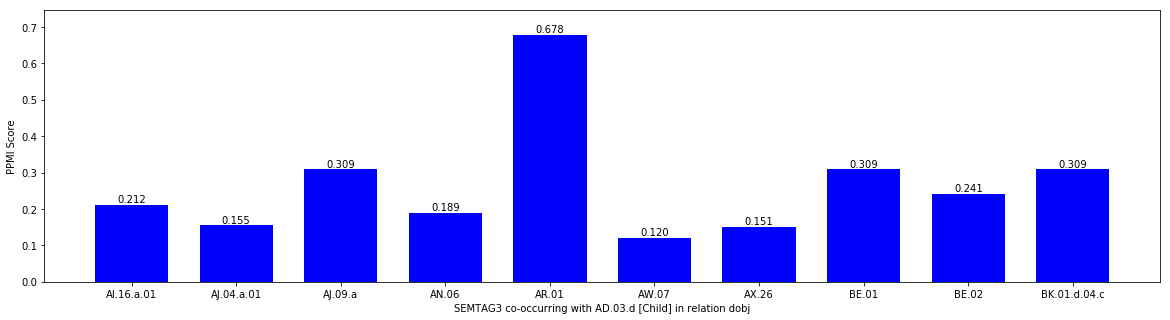

In [48]:
c=mnonl.get_top_features('AD.03.d',rel='dobj',displaygraph=True)

(AK.01 [Existence],0.6428908232938382) : [('came', 15)]
(AW.06.b [Receiving],0.39570179773871583) : [('came', 9), ('come', 2), ('received', 1), ('got', 1)]
(AN.05.l [Movement towards a thing/person/position],0.3623086193405466) : [('came', 11)]
(AK.04 [Present events],0.18595625294707085) : [('came', 5), ('come', 1)]
(AN.04.a.01 [Going swiftly on foot],0.16566360712533731) : [('ran', 4), ('running', 1), ('run', 1)]
(AL.06 [Direction],0.13798665320076026) : [('pointed', 2), ('turned', 1), ('directed', 1)]
(AX.03 [Speech],0.13790030001835907) : [('said', 18), ('went', 7), ('go', 3), ('say', 2), ('says', 1)]
(AN.05.d [Forward movement],0.12496712275288017) : [('come', 1), ('came', 1)]
(BH.14 [Navigation],0.1198422093245882) : [('purchased', 2)]
(BB.10 [Lack of subjection],0.10755612591093822) : [('stood', 2)]


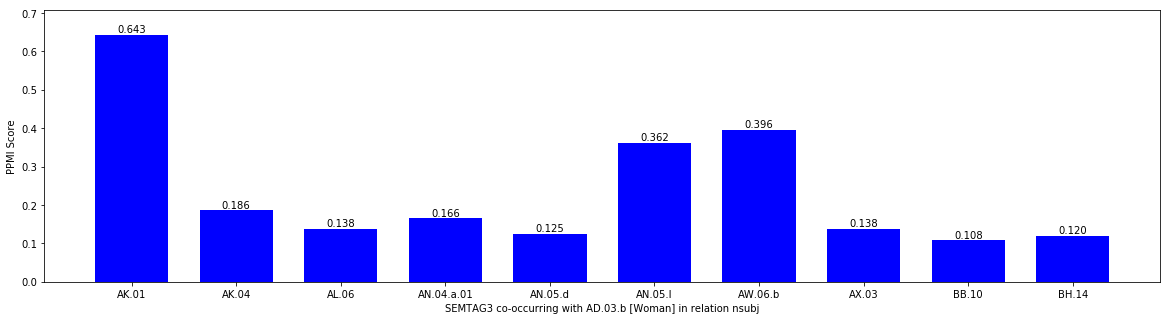

In [41]:
w=mnonl.get_top_features('AD.03.b',rel='nsubj',displaygraph=True)

(AK.01 [Existence],0.5950974477144844) : [('came', 46), ('come', 2), ('exist', 1)]
(AN.05.l [Movement towards a thing/person/position],0.40454685118073885) : [('came', 33), ('come', 8), ('accosted', 1)]
(AW.11 [Giving],0.2978399745128611) : [('gave', 46), ('given', 4), ('returned', 3), ('give', 2)]
(AE.14.j.02 [Horse defined by purpose],0.2752863133727241) : [('ran', 11), ('run', 3), ('running', 2), ('bolted', 1)]
(AR.42.h [Dissimulation, pretence],0.23291940544020412) : [('came', 17), ('come', 5)]
(AN.06 [Transference],0.18935061033520204) : [('brought', 35), ('bring', 2), ('sent', 1), ('fetched', 1)]
(AN.04.a.01 [Going swiftly on foot],0.18372486671967536) : [('ran', 13), ('running', 6), ('run', 4)]
(AN.05.g.02 [Leaping/springing/jumping],0.15136715769910306) : [('jumped', 9), ('sprung', 1), ('jump', 1)]
(AO.09 [Ceasing],0.1411679181957021) : [('stopped', 16), ('stop', 2)]
(AK.03.b [Source/origin],0.12959211674576307) : [('come', 6), ('came', 5)]


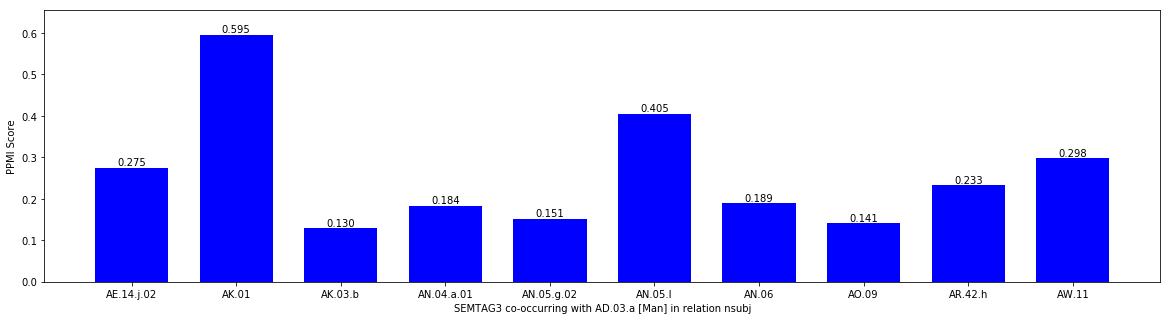

In [45]:
m=mnonl.get_top_features('AD.03.a',rel='nsubj',displaygraph=True)

(AK.01 [Existence],0.95409124845893) : [('unborn', 13)]
(ZZ [Unrecognised],0.1908840760562933) : [('crying', 3), ('alarmed', 1)]
(AH.02.c.01 [Nakedness/state of being unclothed],0.15217994695633166) : [('naked', 1)]
(AX.21 [Naming],0.08381256030723544) : [('christened', 1)]
(AX.12 [Requesting],0.06905222947835517) : [('cried', 2), ('crying', 1)]
(AE.14.j.02 [Horse defined by purpose],0.05792874121461924) : [('ran', 1)]
(AG.02.c [Cultivation/tillage],0.04958462371096813) : [('picked', 1)]
(BK.07.c.05 [Acting],0.0461056288325589) : [('came', 1)]
(AX.06 [Rhetoric],0.04256941970667248) : [('delivered', 1)]
(AL.06 [Direction],0.04078439401647093) : [('pointed', 1)]


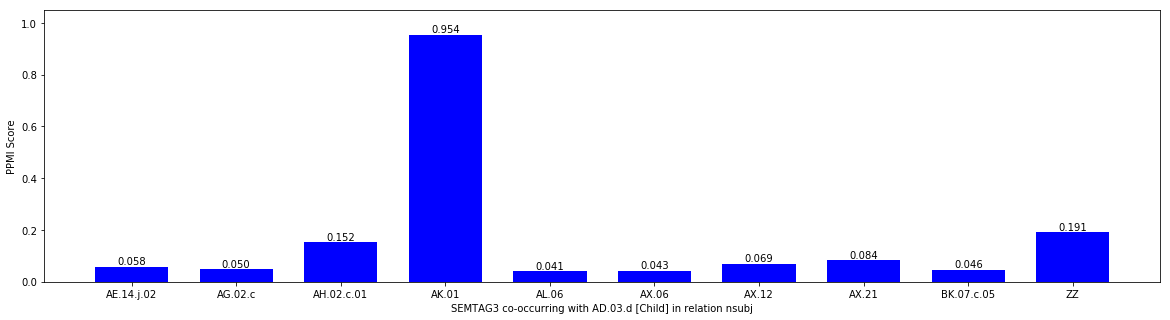

In [49]:
c=mnonl.get_top_features('AD.03.d',rel='nsubj',displaygraph=True)

(BC.09.e.01 [Legal seizure/recovery of property],0.6014147240705527) : [('distressed', 1)]
(BB.02.a [Command/bidding],0.34388154348981465) : [('imposed', 1)]
(BC.09.f.05 [Judging],0.3265429245859007) : [('convicted', 1)]
(AC.02.c.01 [Examination],0.3074593188127572) : [('examined', 1)]
(BC.09.e.02 [Arrest],0.30323199548151786) : [('committed', 1)]
(AN.05.j [Going/coming in],0.2779638592653794) : [('brought', 1)]
(AN.05.m [Going away],0.21364451713764998) : [('left', 1)]
(BI.08 [Lack of work],0.2104742530350145) : [('discharged', 1)]
(AK.02 [Creation],0.15792578805953686) : [('brought', 1)]
(AX.15 [Promise, pledge],0.13352888661105033) : [('pledged', 1)]


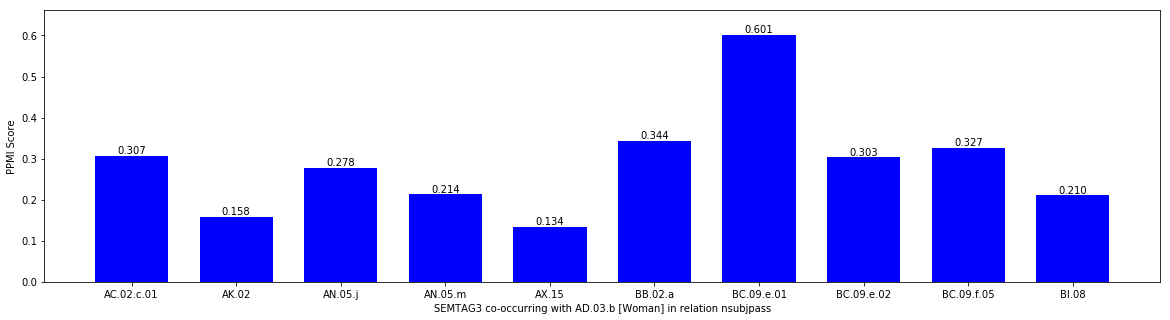

In [42]:
w=mnonl.get_top_features('AD.03.b',rel='nsubjpass',displaygraph=True)

(AW.15 [Taking],0.6526073363415216) : [('taken', 10)]
(BB.03 [Control],0.3502282910169718) : [('managed', 1), ('led', 1)]
(AR.50 [Expectation],0.24779710111596517) : [('expected', 1)]
(BB.09.e.01.b [Binding/fettering],0.2143014938672501) : [('handcuffed', 1)]
(AO.16.c [Escape],0.2143014938672501) : [('escaped', 1)]
(AN.04.a.01 [Going swiftly on foot],0.2143014938672501) : [('ran', 1)]
(AL.04.a [Position/situation],0.18080588661853494) : [('stationed', 1)]
(AC.01.a [Ill-health in external/visible body parts],0.18080588661853494) : [('caught', 1)]
(AU.23 [Annoyance, vexation],0.17002270958986074) : [('taken', 1)]
(AP.06.f [Decrease/reduction in quantity/amount/degree],0.17002270958986074) : [('allowed', 1)]


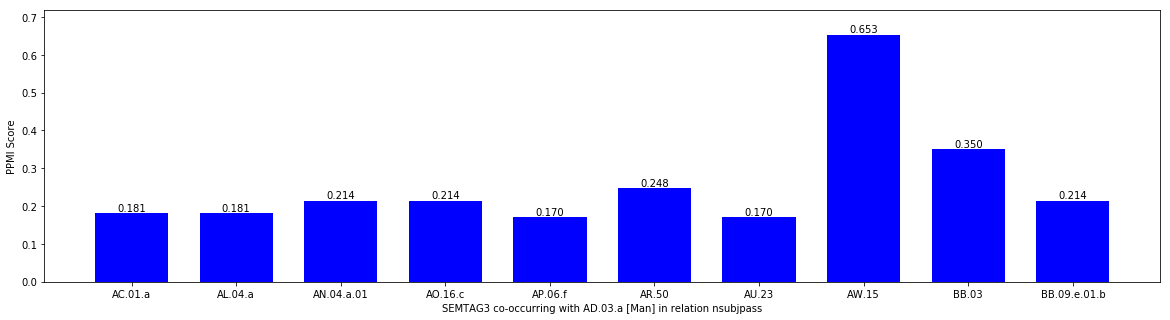

In [46]:
m=mnonl.get_top_features('AD.03.a',rel='nsubjpass',displaygraph=True)

(AC.02.c.01 [Examination],0.7004917057259638) : [('examined', 1)]
(BJ.01.j [Selling],0.5301059831903824) : [('dressed', 1)]
(AO.11.b [Searching/seeking],0.477806463743311) : [('searched', 1)]


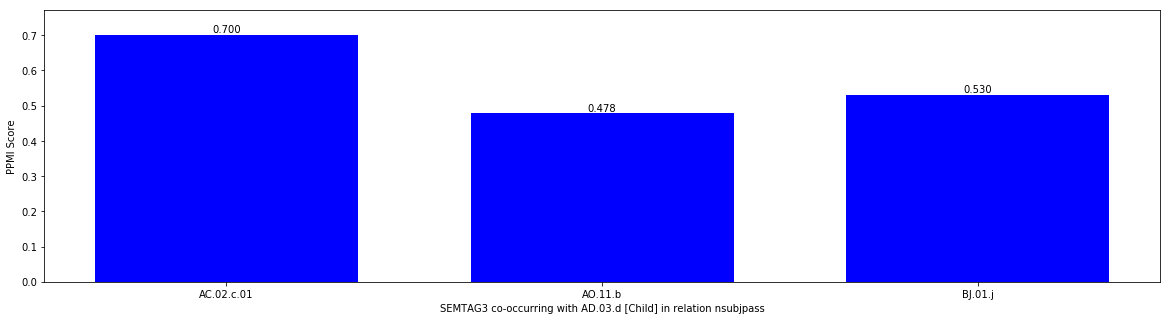

In [50]:
c=mnonl.get_top_features('AD.03.d',rel='nsubjpass',displaygraph=True)

(ZZ [Unrecognised],0.9976968385830179) : [('another', 41)]
(ZF [Pronoun],0.05035391075948647) : [('that', 14)]
(AX.03 [Speech],0.04462143405397368) : [('said', 1)]
(AP.01 [Relation/relationship],0.008627257712849432) : [('which', 1)]


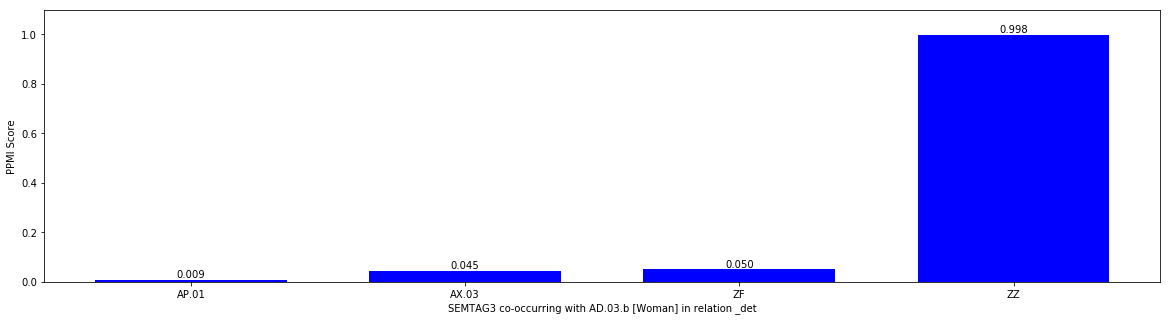

In [43]:
w=mnonl.get_top_features('AD.03.b',rel='_det',displaygraph=True)

(ZZ [Unrecognised],0.9985545449877657) : [('another', 195)]
(ZF [Pronoun],0.04643557151941285) : [('that', 62)]
(AD.03.a [Man],0.024503472695104042) : [('a', 3)]
(BG.07.d [Written character],0.008167824231701348) : [('m', 1)]
(AX.03 [Speech],0.0056213213977632515) : [('said', 1)]
(AP.02.b [Individual character/quality],0.004801929527758398) : [('each', 3)]
(AK.01.a [Non-existence],0.003223021898177869) : [('no', 3)]
(AX.24 [Denial, dissent],0.000615795046433376) : [('no', 1)]


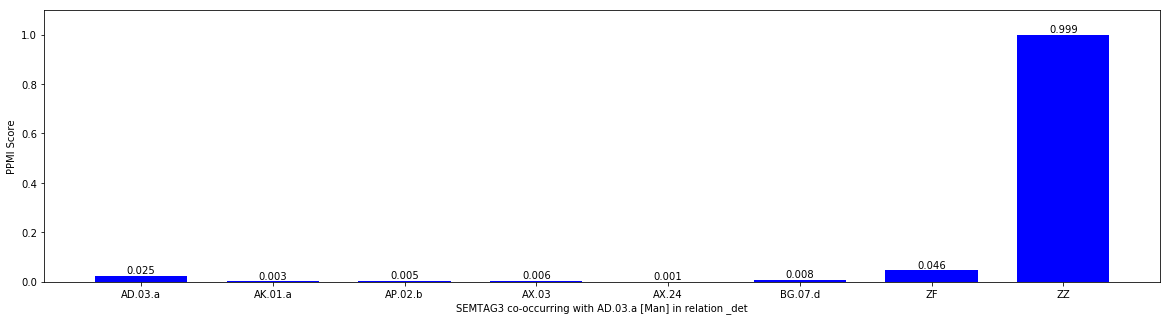

In [47]:
m=mnonl.get_top_features('AD.03.a',rel='_det',displaygraph=True)

(ZC [Grammatical Item],0.9894433364574526) : [('the', 76), ('a', 47), ('this', 4), ('an', 1)]
(AP.06 [Quantity],0.1449202675264716) : [('some', 3)]


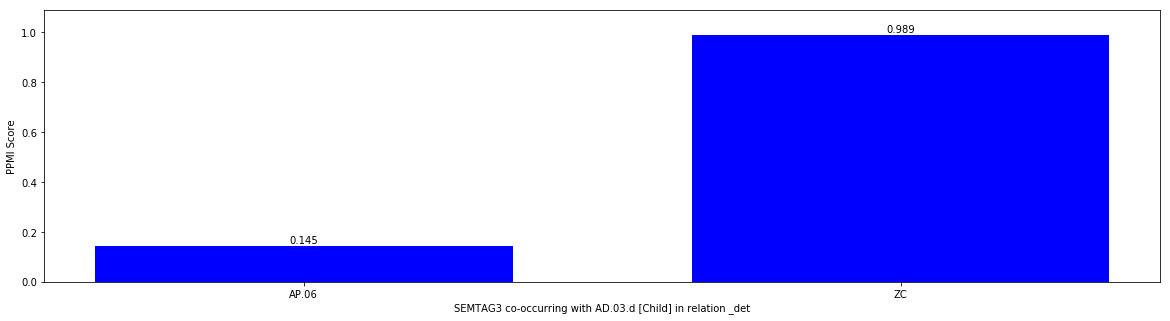

In [51]:
c=mnonl.get_top_features('AD.03.d',rel='_det',displaygraph=True)

# Similar Concepts
We can find the similarity between 2 concepts in the given corpus

First, the similarities between WOMAN-MAN, WOMAN-CHILD and MAN-CHILD over the whole LPMI matrix (all grammatical relations)

We can also look at a particular relation.  We can see that MAN and WOMAN are similar in terms of their adjectival modifies and the verbs which are done to them, but disimilar in terms of the verbs they do.  On the other hand, WOMAN and CHILD and MAN and CHILD seem consistently dissimilar in all these relations.


In [52]:
rels=[None,'_amod','dobj','nsubj','_det','nsubjpass']
for rel in rels:
    print(rel)
    print("WOMAN-MAN: {}".format(mnonl.find_similarity('AD.03.a','AD.03.b',rel)))
    print("MAN-CHILD: {}".format(mnonl.find_similarity('AD.03.a','AD.03.d',rel)))
    print("WOMAN-CHILD: {}".format(mnonl.find_similarity('AD.03.b','AD.03.d',rel)))
    print("-----")

None
WOMAN-MAN: 0.9728788652496243
MAN-CHILD: 0.5205110596689031
WOMAN-CHILD: 0.5267768691515803
-----
_amod
WOMAN-MAN: 0.9572309329278561
MAN-CHILD: 0.0546002247558351
WOMAN-CHILD: 0.055697409301285764
-----
dobj
WOMAN-MAN: 0.6921775490345037
MAN-CHILD: 0.016020086150965493
WOMAN-CHILD: 0.03116051249414836
-----
nsubj
WOMAN-MAN: 0.6955542760547022
MAN-CHILD: 0.6137434726837381
WOMAN-CHILD: 0.6477618634860821
-----
_det
WOMAN-MAN: 0.9988437567333986
MAN-CHILD: 0.0
WOMAN-CHILD: 0.0
-----
nsubjpass
WOMAN-MAN: 0.07125759776689064
MAN-CHILD: 0.03542888834161152
WOMAN-CHILD: 0.21537270267649117
-----


# Finding Nearest Neighbours


In [56]:
concepts=['AD.03.b','AD.03.a','AD.03.d']
for concept in concepts:
    for rel in rels:
        print('{} neighbours for {}'.format(concept,rel))
        print(mnonl.find_knn(concept,rel))
        print("-----")

AD.03.b neighbours for None
[('AD.03.b [Woman]', 1.0000000000000004), ('AD.03.a [Man]', 0.9728788652496243), ('BB.12.e.02 [Prisoner]', 0.9261394294857804), ('BB.09.e.01.a [Confinement]', 0.9244608893292509), ('BI.11.x.01 [Bag]', 0.9080265587075815), ('BC.09.e.03 [Accusation/allegation/indictment]', 0.9010032358826738), ('AD.03.d.01 [Boy]', 0.9009924193283305), ('AY.06.a.03.a [Title/form of address for persons of rank]', 0.8981343889699909), ('BC.07.b [Law-enforcement/peace-officer]', 0.8964143243781715), ('AB.17.f [Bodily substance, tissue]', 0.895703293186243)]
-----
AD.03.b neighbours for _amod
[('AD.03.b [Woman]', 0.9999999999999999), ('AD.03.a [Man]', 0.9572309329278561), ('AD.03.c.02 [Young woman]', 0.8819557730260679), ('BI.12.a.07.a [Skin with hair attached/fur]', 0.8819557730260679), ('AD.03.c.01 [Youth/young man]', 0.8267577472379222), ('BD.05.g.02 [Unchastity]', 0.8130147561320559), ('BE.04 [Member of university]', 0.6951622874109246), ('AU.27.c [Terms of endearment]', 0.6161

AD.03.d neighbours for _det
[('AD.03.d [Child]', 0.9999999999999999), ('AG.01.d.02 [Part/joint of animal]', 0.9998362130159347), ('BK.01.d.04.e [Card-game]', 0.9995341739075564), ('BK.05.d.05 [Drawing]', 0.9993936942421354), ('BI.11.b [Shaping tools/equipme]', 0.9967444215940044), ('AI.16.a.01.b [Washing clothes and textile articles]', 0.9967444215940044), ('BI.09.c.06 [Woodworker]', 0.9964700221969041), ('BI.11.k [Ladder]', 0.9950647430723482), ('AE.13.o [Order Passeriformes (song-birds)]', 0.9939283270632321), ('BK.01.e.03 [Top]', 0.9925206644156186)]
-----
AD.03.d neighbours for nsubjpass
[('AD.03.d [Child]', 1.0), ('AB.10 [Physical Aspects of Organisms]', 0.5301059831903824), ('AH.01.h.03.c [Made from silk]', 0.5301059831903824), ('BG.07.h [Writing materials]', 0.4835815097317604), ('BA.15.a.02.a [Spear/lance]', 0.477806463743311), ('AM.08.b [The present (time)]', 0.477806463743311), ('AO.09 [Ceasing]', 0.4771016484446194), ('AZ.06.e.01 [Accommodation/lodging]', 0.4544479850936115)

## Comparing Corpora
We need a Samuels Comparator which takes a dictionary of filenames (as set up above) and allows us to compare one against the rest

In [25]:
test={'fnonl':'f_nonl','mnonl':'m_nonl'}

my_comp=Sam.Comparator(filenames)

Now we can compute the characteristic terms of one corpus compared to the others.  The key for the corpus which is to be compared against the others needs to be given.  

measure: default = 'llr'; others include 'pmi', 'kl' and 'jsd'

field: default = 'SEMTAG3'; any other field in the dataframe can be given e.g., 'SEMTAG1' or 'vard' but not extensively tested

cutoff: all distinctive tags will be returned for LLR, but this is used to cutoff the number for other measures and also in the list that is displayed automatically and is used in the graph

displaygraph: True to display a barchart of the terms 

Size of corpus is 219407
Size of corpus is 1302410
118 significantly characterising terms
Number of characteristic tags is 118
(AY.01.g.02 [Married man], 1331.5348625452032) : [('husband', 518), ('husbands', 5)]
(AZ.06.f.02.f [Room], 298.0152017216491) : [('room', 616), ('cellar', 23), ('garret', 10), ('rooms', 7), ('bedroom', 6), ('scullery', 4), ('closet', 4), ('back-parlour', 4), ('sitting-room', 3), ('loft', 3)]
(BF.25.j [Vestments], 269.97472034528187) : [('gown', 165), ('apron', 98), ('gowns', 57), ('aprons', 11), ('shovels', 3), ('shovel', 1)]
(AK.01 [Existence], 239.48993713865343) : [('things', 513), ('thing', 176), ('came', 176), ('in', 140), ('up', 56), ('come', 20), ('unborn', 2), ('ware', 1), ('is', 1), ('existence', 1)]
(AY.01.g.01 [Married woman], 230.99585901972938) : [('wife', 333), ('woman', 3), ("ma'am", 3)]
(AZ.06.f.02.h [Stairs], 226.160270676862) : [('stairs', 375), ('landing', 3), ('staircase', 2), ('stair-foot', 1), ('stair', 1), ('landing-place', 1)]
(AY.01.e.0

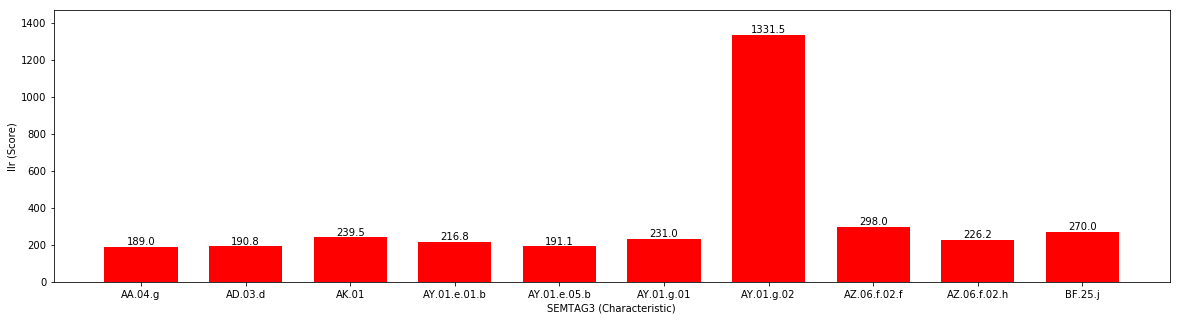

In [26]:
fdef_tags=my_comp.compute_surprises('fnonl',measure='llr',field='SEMTAG3',cutoff=10,displaygraph=True)

Size of corpus is 1083003
Size of corpus is 1302410
149 significantly characterising terms
Number of characteristic tags is 149
(BC.07.b [Law-enforcement/peace-officer], 121.22645044794501) : [('constable', 1131), ('watch-house', 312), ('watchman', 285), ('watchmen', 25), ('constables', 11), ('officer', 6)]
(BB.03 [Control], 106.7051027720248) : [('of', 110), ('charge', 109), ('took', 73), ('led', 47), ('take', 35), ('leads', 25), ('leading', 19), ('lead', 16), ('hold', 11), ('direction', 8)]
(BB.12.d.01 [Instrument/place of torture], 97.49795967762898) : [('horse', 409), ('horses', 131), ('boots', 5), ('wheels', 1), ('wheel', 1), ('picket', 1), ('gridiron', 1)]
(BA.14.k.08.a [Officer/soldier of rank], 95.35990438429283) : [('officer', 1501), ('officers', 111), ('commanding', 1)]
(AK.02 [Creation], 89.96684826455936) : [('produce', 414), ('produced', 369), ('made', 339), ('produces', 244), ('make', 114), ('producing', 62), ('making', 33), ('up', 20), ('brought', 19), ('makes', 7)]
(AO.

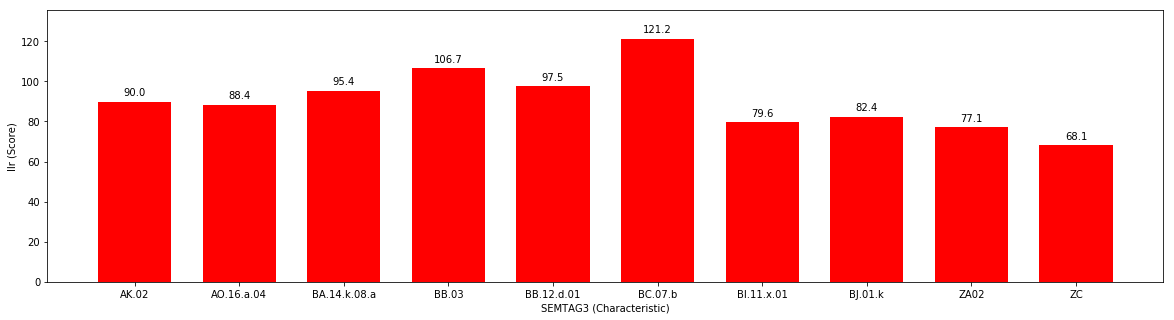

In [27]:
mwv_tags=my_comp.compute_surprises('mnonl',field='SEMTAG3',measure='llr',cutoff=10,displaygraph=True)